<a href="https://colab.research.google.com/github/Gaurav-Yaduvanshi/Netflix-Movie-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movie and TV Shows Clustering



##### **Project Type**    - ML/Unsupervised(Clustering,Content Based Recommendation System)
##### **Contribution**    - Individual


# **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

In this project, we worked on a text clustering problem where we had to classify/group the Netflix movie/shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

The dataset contained about 7787 records, and 11 attributes.

We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).

Creating cluster using following attributes: director, cast, country, genre, rating and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.

We used Principal Component Analysis (PCA) to handle the curse of dimensionality.

We built Two types of clusters using the K-Means Clustering and Agglomerative Heirachycal clustering algorithm and find out optimal number of clusters using diffrent technique such as elbow method, silhoutte score and dendogram etc.

A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.

# **GitHub Link -**

https://github.com/Gaurav-Yaduvanshi/Netflix-Movie-and-TV-Shows-Clustering

# **Problem Statement**


Netflix is the world's largest online streaming service provider, with over 220 million subscribers as of 2022-Q2. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscriber churn.

We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences. 

We are required to do
Exploratory Data Analysis,
Understanding what type content is available in different countries,
Is Netflix has increasingly focusing on TV rather than movies in recent years,
Clustering similar content by matching text-based features.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [27]:
# library used for Analyzing and Visualization purpose
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data prerocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation

# library used for Clusters impelementation
from sklearn.cluster import KMeans , AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy.cluster.hierarchy as shc

# library used for building recommandation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Warnings library. Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Almabetter/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('Number of Rows : {} \nNumber of Columns : {}'.format(df.shape[0],df.shape[1]))

Number of Rows : 7787 
Number of Columns : 12


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(len(df[df.duplicated()]))

0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending=False)

director        2389
cast             718
country          507
date_added        10
rating             7
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

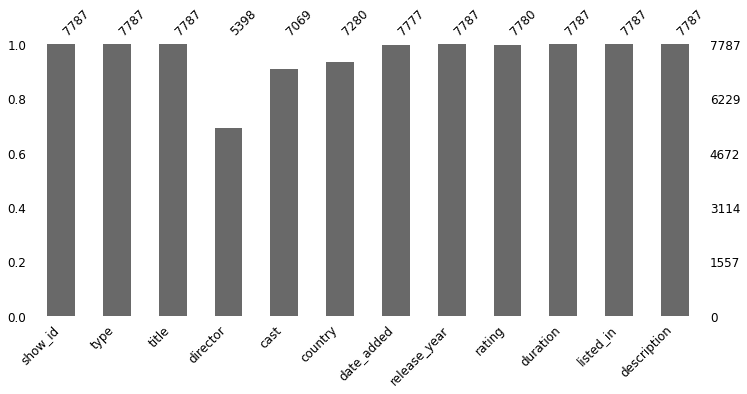

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(df,figsize=(12,5), fontsize=12)
plt.show()

### What did you know about your dataset?

Null values present in the director, cast, country, date_added and rating column.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [ ]:
# Dataset Describe
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df_desc = []
for column in df.columns:
  df_desc.append([column,
                  df[column].dtypes,
                  df[column].isnull().sum(),
                  round(df[column].isnull().sum()/len(df)*100, 2),
                  df[column].nunique(),
                  df[column].unique()])

## storing all the information in a table
column_desc = pd.DataFrame(df_desc, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
column_desc

,Column,Dtype,Null,Null (%),nUnique,Unique
0,show_id,object,0,0.00,7787,"[s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,..."
1,type,object,0,0.00,2,"[TV Show, Movie]"
2,title,object,0,0.00,7787,"[3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19..."
3,director,object,2389,30.68,4049,"[nan, Jorge Michel Grau, Gilbert Chan, Shane A..."
4,cast,object,718,9.22,6831,"[João Miguel, Bianca Comparato, Michel Gomes, ..."
5,country,object,507,6.51,681,"[Brazil, Mexico, Singapore, United States, Tur..."
6,date_added,object,10,0.13,1565,"[August 14, 2020, December 23, 2016, December ..."
7,release_year,int64,0,0.00,73,"[2020, 2016, 2011, 2009, 2008, 2019, 1997, 201..."
8,rating,object,7,0.09,14,"[TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y..."
9,duration,object,0,0.00,216,"[4 Seasons, 93 min, 78 min, 80 min, 123 min, 1..."


## 3. ***Data Wrangling***

In [12]:
# Creating a copy of original dataet
df1 = df.copy()

In [13]:
# Extract year, month, day and from "date_added"
df1['date_added'] = pd.to_datetime(df1['date_added'])
df1['added_year'] = df1['date_added'].dt.year
df1['added_month'] = df1['date_added'].dt.month
df1['added_day'] = df1['date_added'].dt.day

# Dropping 'date_added' as we create seperate columns
df1.drop('date_added',axis=1,inplace=True)

# Renaming 'listed_in' column to 'genres'.
df1.rename(columns={'listed_in':'genres'},inplace=True)

In [14]:
# Top 5 features
df1.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,genres,description,added_year,added_month,added_day
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0,14.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0,23.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0,20.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0,16.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,1.0,1.0


In [8]:
# Creating two extra columns for TV_shows and Movies
TV_Shows = df[df['type']=='TV Show']
Movies = df[df['type']=='Movie']    

In [ ]:
# Top 10 director who directed TV Shows
Top_10_TV_Show_director = TV_Shows.groupby(['director'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False).head(10)
print(Top_10_TV_Show_director)

                                    director  count
3                        Alastair Fothergill      3
141                          Rob Seidenglanz      2
85                                 Ken Burns      2
147                              Shin Won-ho      2
61                            Iginio Straffi      2
152                              Stan Lathan      2
127  Pantham Thongsang, Cheewatan Pusitsuksa      1
126                               Pali Yahya      1
114                             Miguel Conde      1
115                       Neslihan Yesilyurt      1


In [ ]:
# Top 10 director who directed Movies
Top_10_Movies_director = Movies.groupby(['director'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False).head(10)
Top_10_Movies_director

,director,count
2962,"Raúl Campos, Jan Suter",18
2235,Marcus Raboy,15
1546,Jay Karas,14
605,Cathy Garcia-Molina,13
3867,Youssef Chahine,12
2300,Martin Scorsese,12
1543,Jay Chapman,12
3472,Steven Spielberg,10
847,David Dhawan,9
3328,Shannon Hartman,8


In [ ]:
# Top 10 actor who cast in Movies
Top_10_Movies_cast = Movies.groupby(['cast'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False).head(10)
Top_10_Movies_cast

,cast,count
3932,Samuel West,10
1949,Jeff Dunham,7
950,Craig Sechler,6
2444,Kevin Hart,6
627,Bill Burr,5
3031,"Michela Luci, Jamie Watson, Eric Peterson, Ann...",5
2032,Jim Gaffigan,5
1046,David Attenborough,5
1738,Iliza Shlesinger,5
4609,Vir Das,4


In [ ]:
# Top 10 actor who cast in Tv Shows
Top_10_TV_Shows_cast = TV_Shows.groupby(['cast'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False).head(10)
Top_10_TV_Shows_cast

,cast,count
472,David Attenborough,13
1362,"Michela Luci, Jamie Watson, Anna Claire Bartla...",4
2044,"You, Reina Triendl, Yoshimi Tokui, Azusa Babaz...",2
277,"Brennan Mejia, Camille Hyde, Yoshi Sudarso, Mi...",2
557,"Elyse Maloway, Vincent Tong, Erin Matthews, An...",2
372,Chris Packham,2
1408,Monty Don,2
1538,Peter Coyote,2
468,Dave Chappelle,2
584,Erik Thompson,2


In [ ]:
# duration of Tv shows
Tv_Shows_duration = TV_Shows.groupby(['duration'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
Tv_Shows_duration

,duration,count
0,1 Season,1608
7,2 Seasons,382
8,3 Seasons,184
9,4 Seasons,87
10,5 Seasons,58
11,6 Seasons,30
12,7 Seasons,19
13,8 Seasons,18
14,9 Seasons,8
1,10 Seasons,6


In [ ]:
# duration of Movies
movies_duration = Movies.groupby(['duration'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
movies_duration

,duration,count
191,90 min,136
194,93 min,131
192,91 min,125
195,94 min,125
196,95 min,119
...,...,...
122,253 min,1
127,3 min,1
130,312 min,1
135,36 min,1


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Type Feature

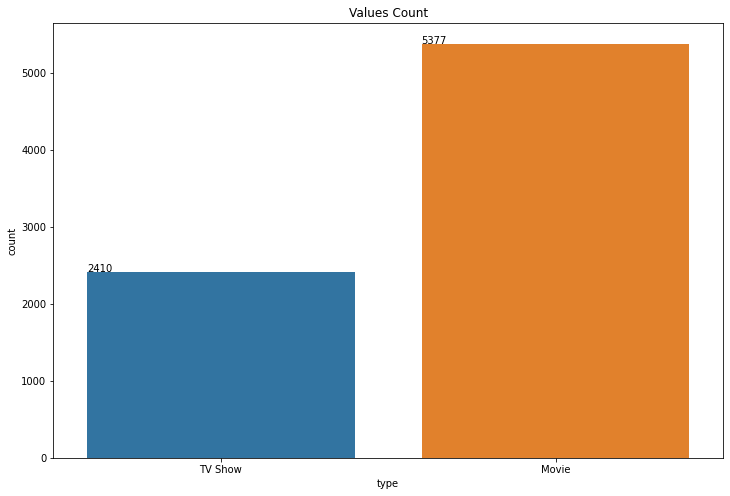

In [ ]:
# Chart - 1 visualization code
# coutplot
g = sns.countplot(x=df['type'])
g.set_title('Values Count')
# adding value count on the top of bar
for p in g.patches:  #adding value count on the top of bar
   g.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))
plt.show()   

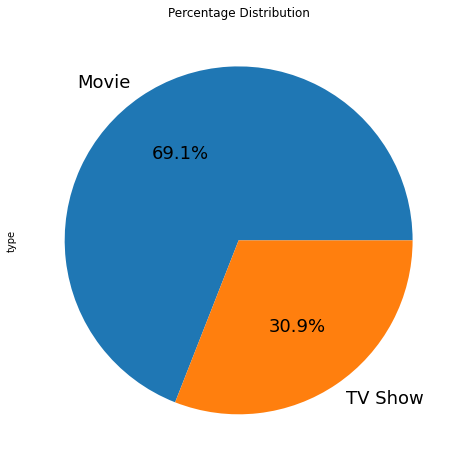

In [ ]:
# piechart
df['type'].value_counts().plot.pie(fontsize= 18,autopct="%.1f%%",figsize=(10,8),textprops={'fontsize': 15})
plt.title('Percentage Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 2 Title Feature

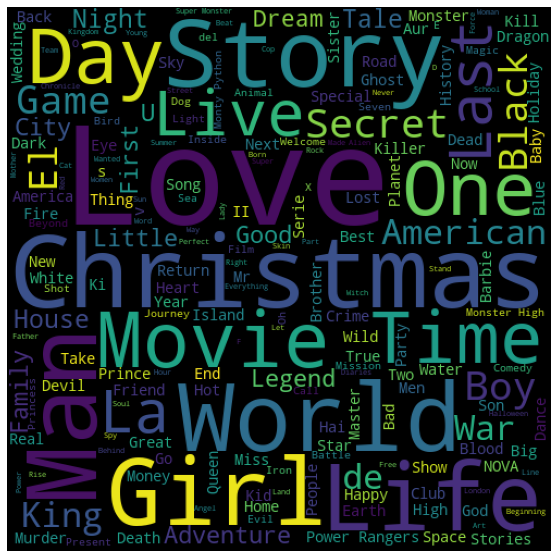

In [ ]:
# Chart - 2 visualization code
# text documents
text = " ".join(word for word in df['title'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud) 
    plt.axis("off");
wordcloud = WordCloud(width = 500, height = 500, background_color='black', random_state=10).generate(text)
plot_cloud(wordcloud)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 3 Director Feature

In [ ]:
df['director'].value_counts().head()

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Name: director, dtype: int64

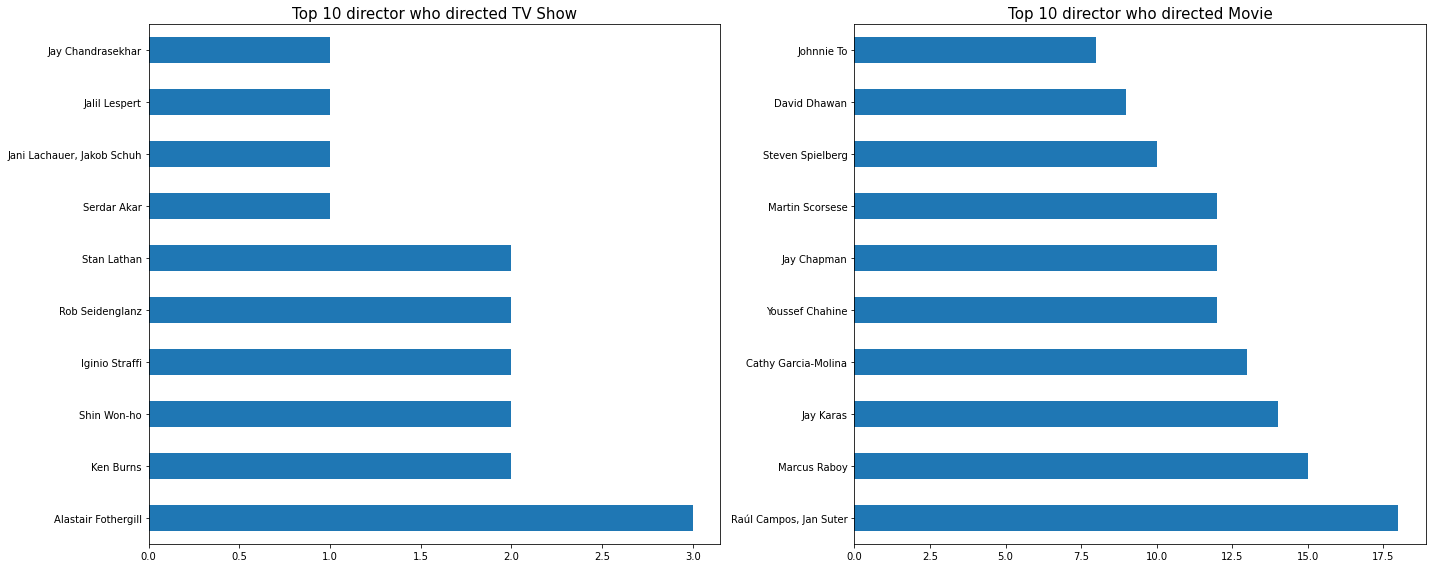

In [ ]:
# Chart - 3 visualization code
fig,ax = plt.subplots(1,2, figsize=(20,8))

# top 10 director who directed TV show
show = df[df['type']=='TV Show']['director'].value_counts().head(10).plot(kind='barh', ax=ax[0])
show.set_title('Top 10 director who directed TV Show', size=15)

# top 10 director who directed movie
movie = df[df['type']=='Movie']['director'].value_counts().head(10).plot(kind='barh', ax=ax[1])
movie.set_title('Top 10 director who directed Movie', size=15)
plt.tight_layout()
plt.show()

Observation:

Alstair Fothergill directed highest number of Tv shows in the dataset which is 3.

Raul Campos and Jan Suter together have directed 18 movies, higher than anyone in the dataset.

#### Chart - 4 Cast Feature

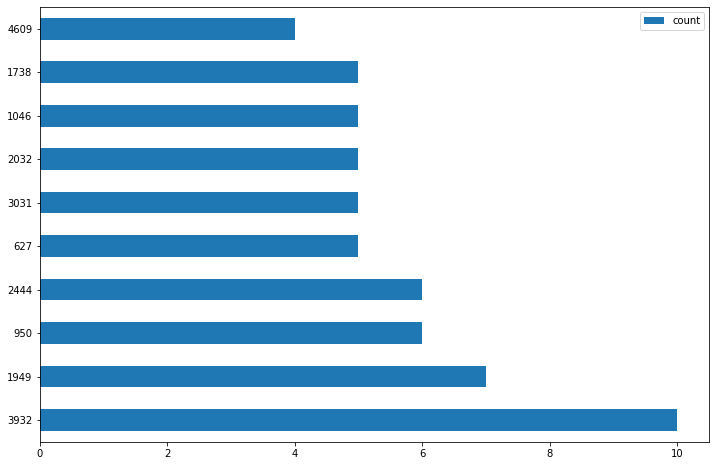

In [ ]:
# Chart - 4 visualization code
Top_10_Movies_cast.plot(kind='barh')
plt.show()

#### Chart - 5 Country Feature

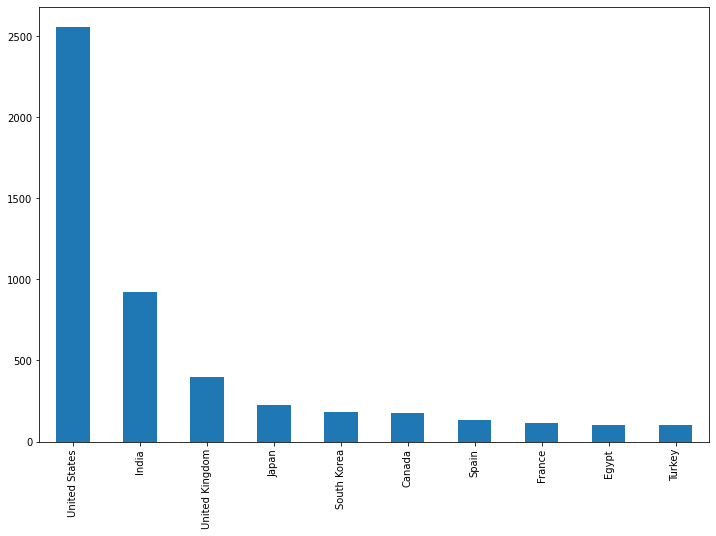

In [ ]:
# Chart - 5 visualization code
df['country'].value_counts().head(10).plot(kind='bar')
plt.show()

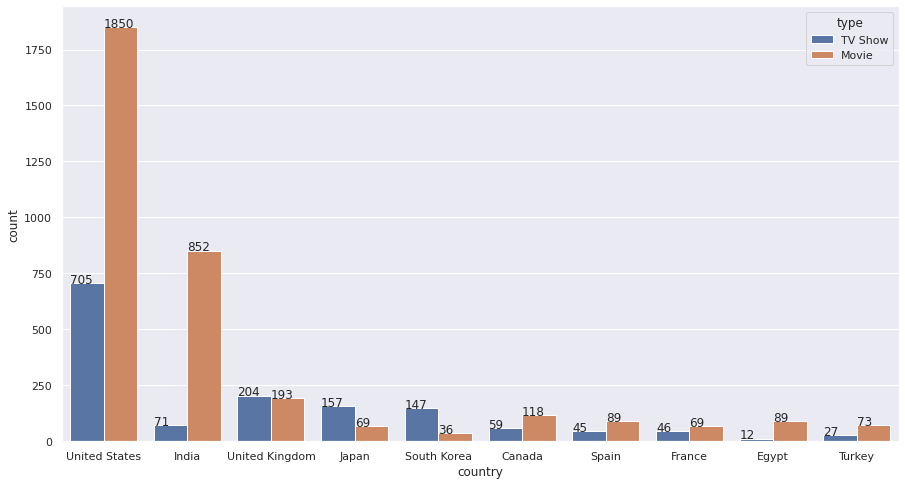

In [ ]:
# Top 10 country with the highest number of TV shows and Movies
sns.set(rc = {'figure.figsize':(15,8)})
graph = sns.countplot(x="country", data=df, hue='type', order=df['country'].value_counts().index[0:10])
for p in graph.patches:  #adding value count on the top of bar
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))
plt.show()   

#### Chart - 6 Release_Year Feature

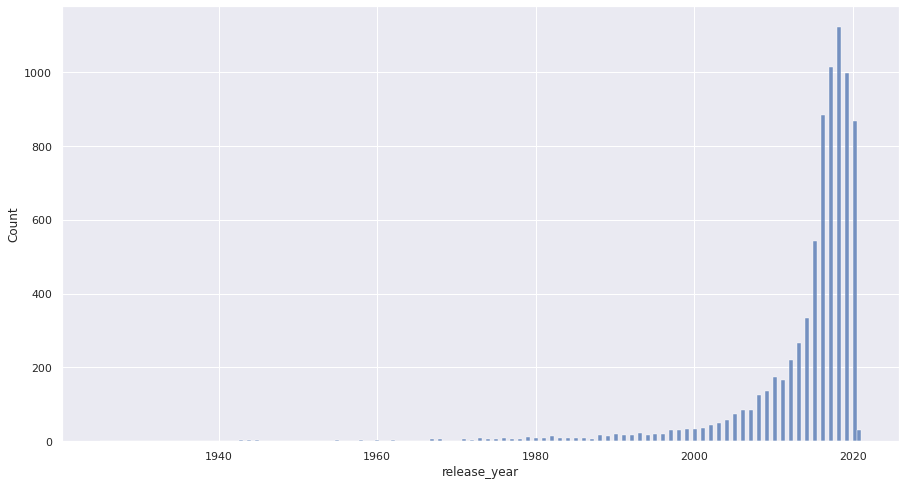

In [ ]:
# Chart - 6 visualization code
sns.histplot(df['release_year'])
plt.show()

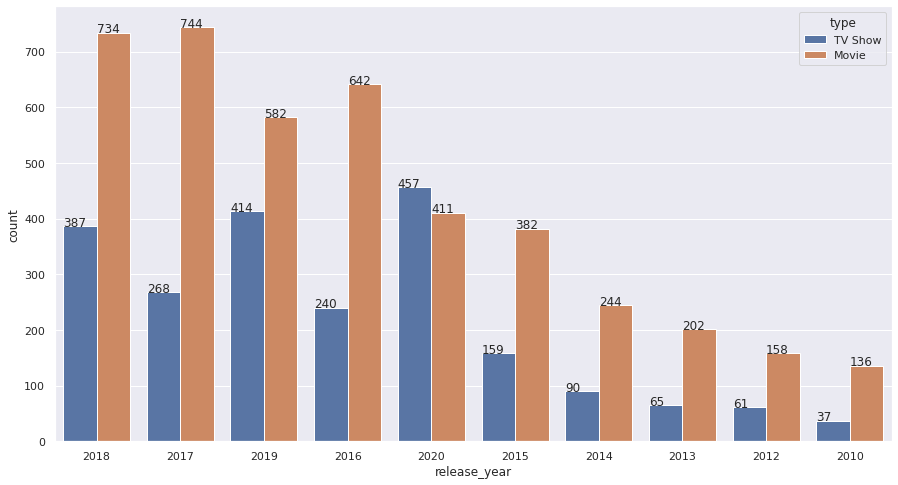

In [ ]:
# Most Released Movies and TV shows 
graph = sns.countplot(x="release_year", data=df, hue='type', order=df['release_year'].value_counts().index[0:10])
for p in graph.patches:  #adding value count on the top of bar
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))
plt.show()  

##### 1. Why did you pick the specific chart?

Observation:

Highest number of movie/shows are relesed in netflix in between 2015-2020 and highest number of count belong from 2018 year

#### Chart - 7 Rating Feature

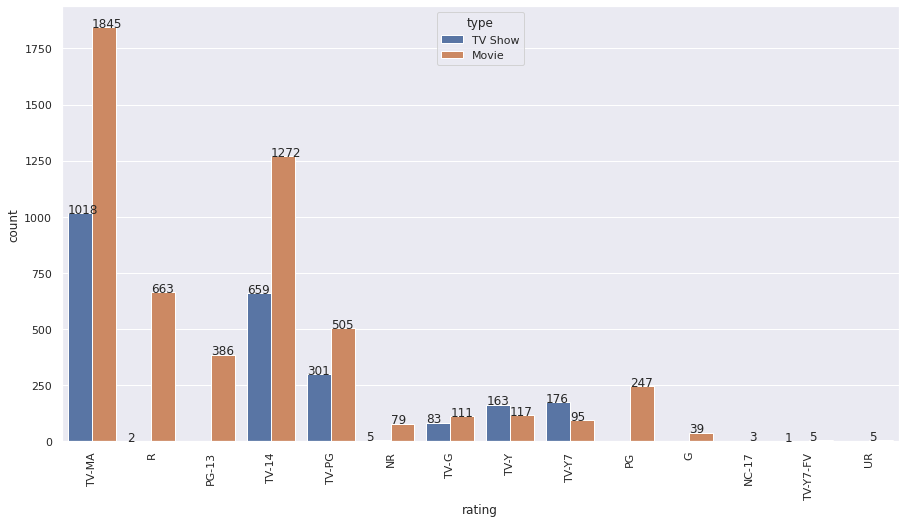

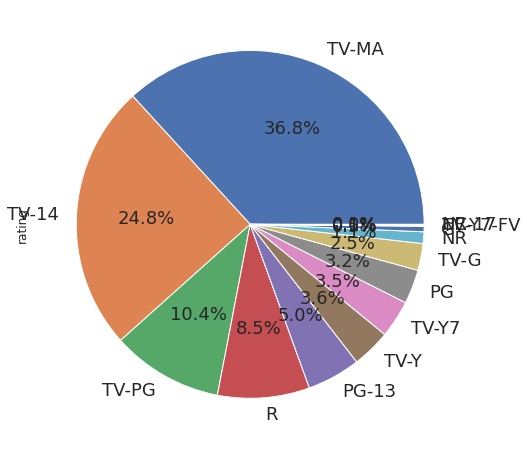

In [ ]:
# Chart - 7 visualization code
# bivariate analysis
graph = sns.countplot(x = df['rating'],data=df,hue=df['type'])
plt.xticks(rotation=90)
for p in graph.patches:  #adding value count on the top of bar
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))
plt.show()

percent = df['rating'].value_counts()
percent.plot.pie(fontsize= 18,autopct="%.1f%%",figsize=(10,8),textprops={'fontsize': 15})
plt.show()

Observation:

#### Chart - 8 Duration Feature

In [ ]:
# Chart - 8 visualization code
df['duration'].value_counts()

1 Season     1608
2 Seasons     382
3 Seasons     184
90 min        136
93 min        131
             ... 
182 min         1
224 min         1
233 min         1
196 min         1
191 min         1
Name: duration, Length: 216, dtype: int64

In [ ]:
print(f"number of movie directed by director is : { df[df['type']=='TV Show']['duration'].value_counts().sum()}")
print(f"number of TV show directed by director is : { df[df['type']=='Movie']['duration'].value_counts().sum()}")

number of movie directed by director is : 2410
number of TV show directed by director is : 5377


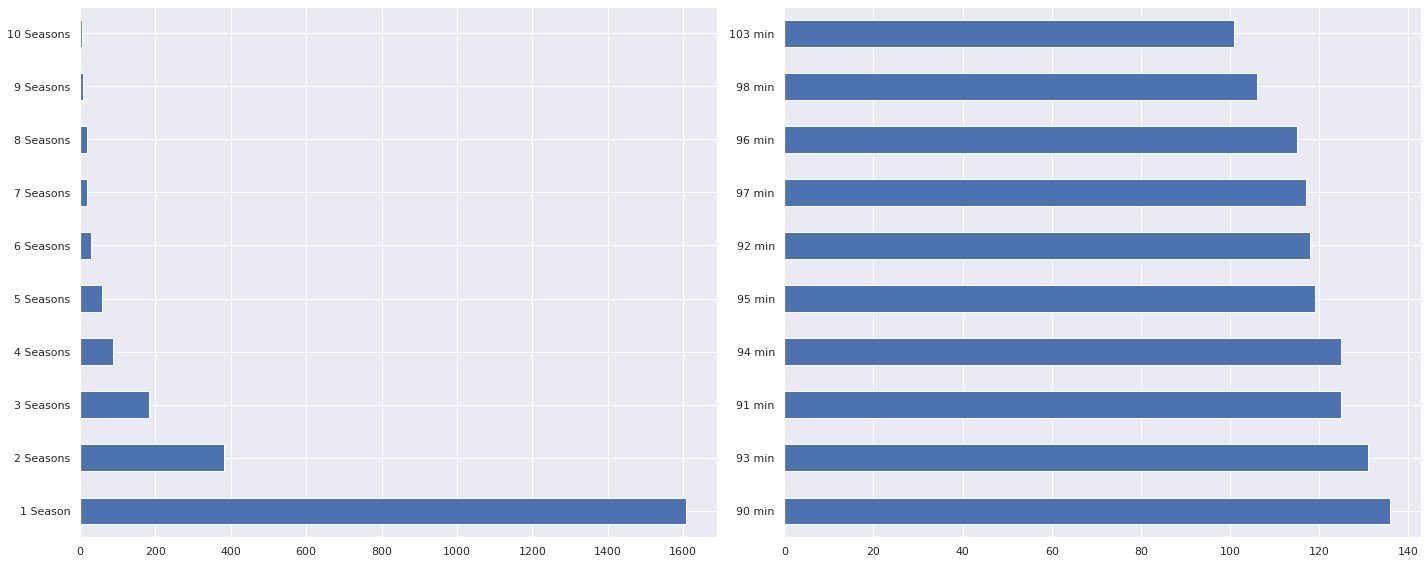

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(20,8))

# Duration of TV shows
TV_Shows_duration = df[df['type']=='TV Show']['duration'].value_counts()[:10].plot(kind='barh', ax=ax[0])

# Duration of Movies
Movies_duration = df[df['type']=='Movie']['duration'].value_counts()[:10].plot(kind='barh', ax=ax[1])

plt.tight_layout()
plt.show()    

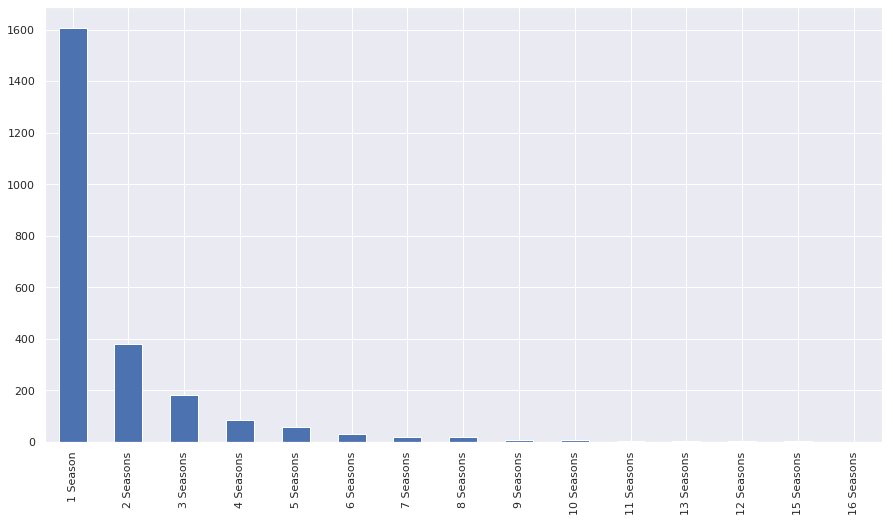

In [ ]:
TV_Shows_duration1 = df[df['type']=='TV Show']['duration'].value_counts().plot(kind='bar')

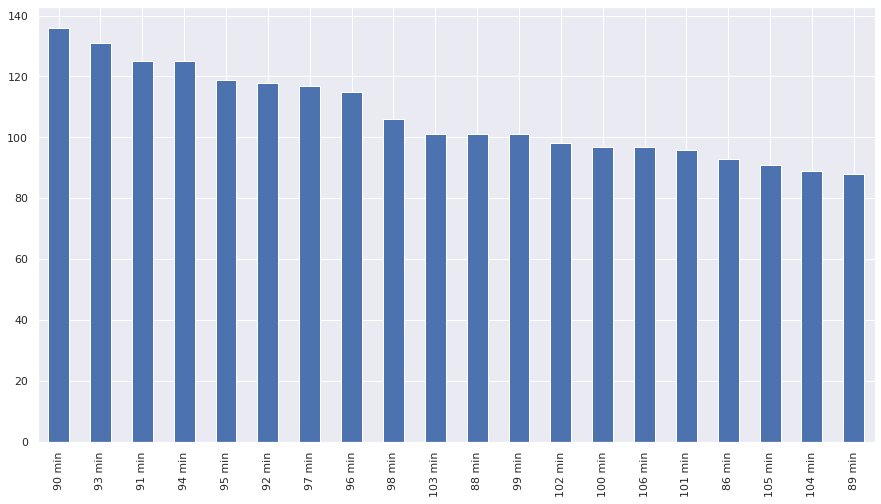

In [ ]:
Movies_duration1 = df[df['type']=='Movie']['duration'].value_counts().head(20).plot(kind='bar')

#### Chart - 9 Listed_In Feature

In [ ]:
# Chart - 9 visualization code
# seperating genre from listed_in columns for analysis purpose
genres = df['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# top 10 genre in listed movie/show
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
print(len(genres))

42


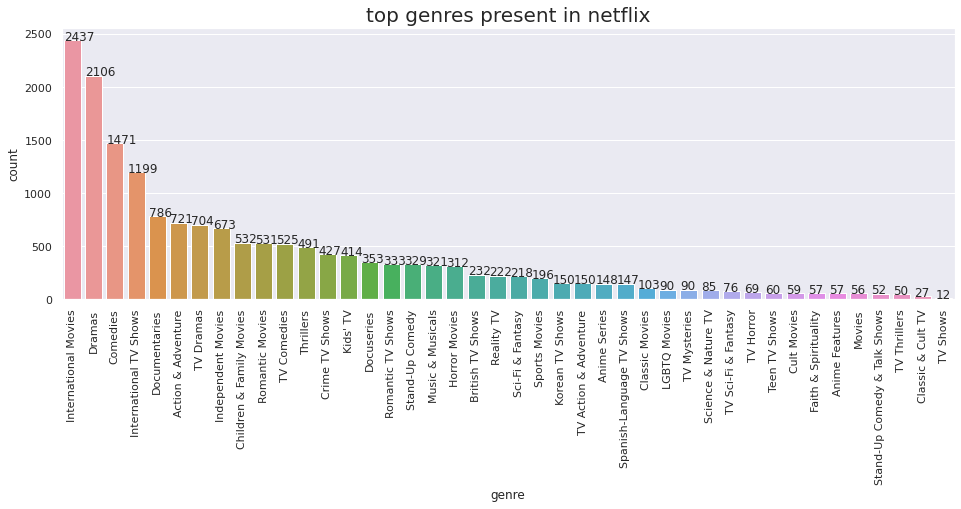

In [ ]:
# plotting graph
plt.figure(figsize=(16,5))
graph = sns.barplot(x='genre', y='count', data=genres)
graph.set_title('top genres present in netflix', size=20)
plt.xticks(rotation=90)

#adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))
plt.show()
     

Obesrvation :

Highest number of genre are International movies, Dramas, Comedies respectively.

Lowest number of genre are Classic & cult TV, TV Thriller, Stand-Up comedy and Talk show.

#### Chart - 10 Descripton Feature

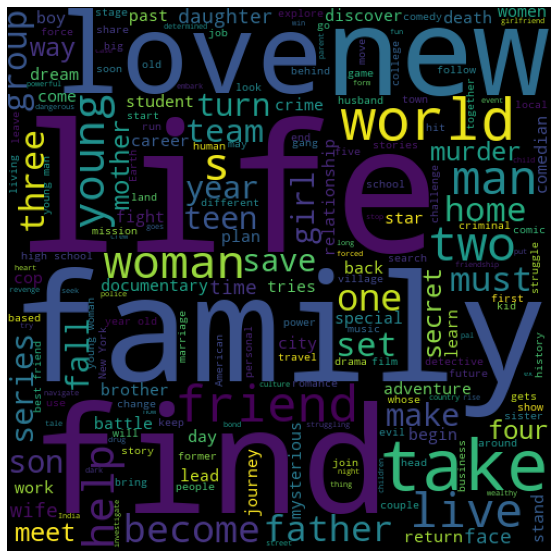

In [ ]:
# Chart - 10 visualization code
# text documents
text = " ".join(word for word in df['description'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud) 
    plt.axis("off");
wordcloud = WordCloud(width = 500, height = 500, background_color='black', random_state=10).generate(text)
plot_cloud(wordcloud)

Observation : 

Most of the comman words present in description column are family, find, life, love, new, world, friend.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [15]:
# Null values
df.isna().sum().sort_values(ascending=False)

director        2389
cast             718
country          507
date_added        10
rating             7
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

The missing values in the director, cast, and country attributes can be replaced with 'empty string' using fillna().

Small amount of null value present in rating and date_added column, if we drop these nan values it will not affect that much while building the model. So, we simply drop the nan value present in rating and date_added columns.

In [6]:
# Handling Missing Values & Missing Value Imputation
#'date_added' and 'rating' contains an insignificant portion of null data so we will drop them from the dataset
df.dropna(subset=['date_added'], inplace=True)
df.dropna(subset=['rating'], inplace=True)

In [7]:
# Replacing null values in director, cast and country
df[['director','cast','country']] = df[['director','cast','country']].fillna(' ')
df.dropna(axis=0, inplace=True)

In [8]:
# Null values
df.isna().sum().sort_values(ascending=False)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### 2. Handling Outliers

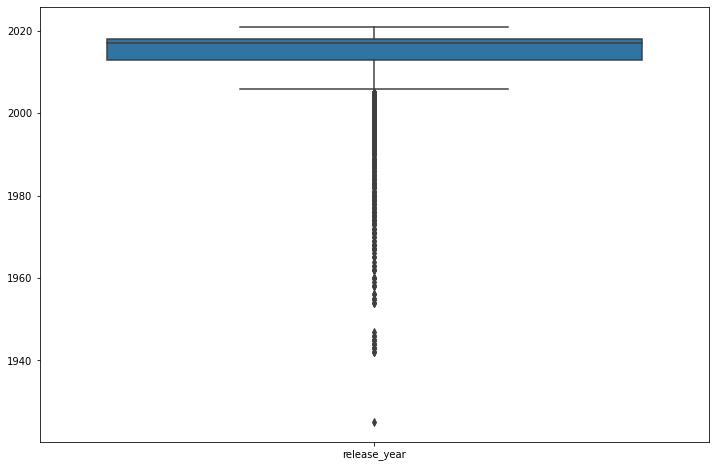

In [20]:
# Handling Outliers & Outlier treatments
sns.boxplot(data=df)
plt.show()

Since, almost all of the data present in textual format except release year.

The data that we need to create cluster/building model are present in textual format. So, there is no need to perform handling outlier.

### 3. Categorical Encoding

In [54]:
df['listed_in'].value_counts().head(20)

Documentaries                                        334
Stand-Up Comedy                                      321
Dramas, International Movies                         320
Comedies, Dramas, International Movies               243
Dramas, Independent Movies, International Movies     215
Kids' TV                                             204
Children & Family Movies                             177
Documentaries, International Movies                  172
Children & Family Movies, Comedies                   169
Comedies, International Movies                       161
Dramas, International Movies, Romantic Movies        153
Comedies, International Movies, Romantic Movies      139
Action & Adventure, Dramas, International Movies     117
Dramas                                               116
International TV Shows, TV Dramas                    111
Dramas, International Movies, Thrillers              109
Crime TV Shows, International TV Shows, TV Dramas    106
Comedies, Dramas, Independent M

In [58]:
# Encode your categorical columns


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### ***3. Textual Data Preprocessing***
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [29]:
# Expand Contraction
# Creating texts column using all text column which one is used for model building purpose.
df['Texts'] = df['description'] + df['listed_in'] + df['rating'] + df['cast'] + df['country'] + df['director'] + df['type']

In [30]:
# First Texts column
df.Texts[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.International TV Shows, TV Dramas, TV Sci-Fi & FantasyTV-MAJoão Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazil TV Show'

#### 3. Removing Punctuations

In [31]:
# Function to Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

df['Texts'] = df['Texts'].apply(remove_punctuation)
df.Texts[0]

'In a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalorInternational TV Shows TV Dramas TV SciFi  FantasyTVMAJoão Miguel Bianca Comparato Michel Gomes Rodolfo Valente Vaneza Oliveira Rafael Lozano Viviane Porto Mel Fronckowiak Sergio Mamberti Zezé Motta Celso FrateschiBrazil TV Show'

#### 5. Removing Stopwords & Lower Casing

In [32]:
# Remove Stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [33]:
# Number of stopwords
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [34]:
# Function for removing stopwords
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

df['Texts'] = df['Texts'].apply(stopwords)
df.Texts[0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalorinternational tv shows tv dramas tv scifi fantasytvmajoão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschibrazil tv show'

#### 6. Rephrase Text

In [ ]:
# Rephrase Text


#### 7. Tokenization

In [35]:
# Tokenization
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['Texts'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [36]:
df.Texts[0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalorinternational tv shows tv dramas tv scifi fantasytvmajoão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschibrazil tv show'

In [37]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

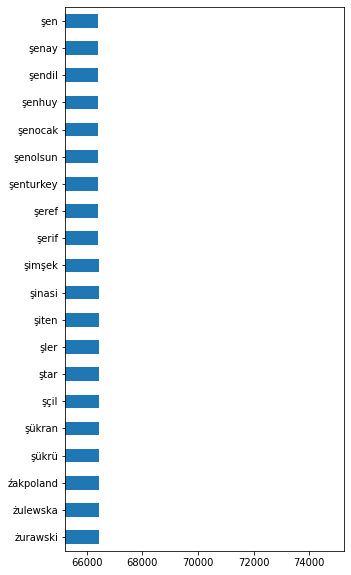

In [43]:
# Bar plot of top words before stemming
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (65230, 75260))

#### 8. Text Normalization

In [44]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

df['Texts'] = df['Texts'].apply(stemming)
df.Texts[0]    

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalorintern tv show tv drama tv scifi fantasytvmajoão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschibrazil tv show'

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [46]:
# Vectorizing Text
# Create the object of tfid vectorizer and  max features = 5000 to prevent system from crashing
tfid_vectorizer = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 5000)

# fit the vectorizer using the text data
tfid_vectorizer.fit(df['Texts'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [47]:
print(len(dictionary)) #number of independet features created from "Texts" columns ---> max_features=5000

5000


In [48]:
# convert X into array form for clustering
X = tfid_vectorizer.transform(df['Texts']).toarray()

# summarize encoded X
print(X)
print(f'shape of the vector : {X.shape}')
print(f'datatype : {type(X)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7770, 5000)
datatype : <class 'numpy.ndarray'>


##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [49]:
# DImensionality Reduction (If needed)
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

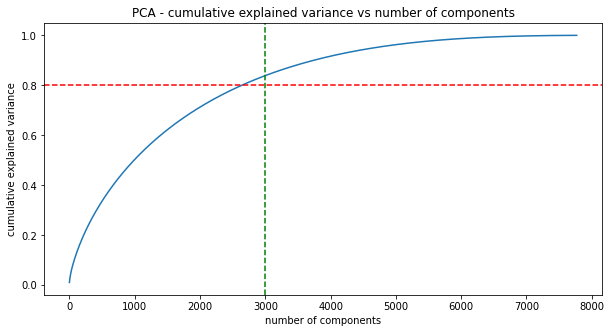

In [50]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()

In [3]:
# reducing the dimensions to 3000 using pca
pca = PCA(n_components=3000, random_state=42)
pca.fit(X)

# transformed features
x = pca.transform(X)

# shape of transformed vectors
x.shape

NameError: ignored

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

## ***7. ML Model Implementation***

### 1 K-Means Clustering

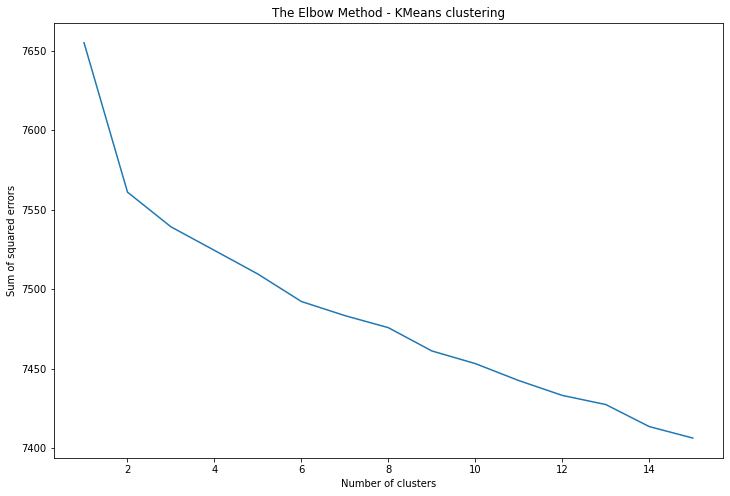

In [25]:
# ML Model - 1 Implementation
# Fit the Algorithm
# Predict on the model
'''Elbow method to find the optimal value of k'''

# Initialize a list to store the sum of squared errors for each value of k
SSE = []

for k in range(1, 16):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Compute the sum of squared errors for the model
  SSE.append(kmeans.inertia_)

# Plot the values of SSE
plt.plot(range(1, 16), SSE)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

#### Displaying Silhouette plot for K means Clustering

#### 2. Cross- Validation & Hyperparameter Tuning

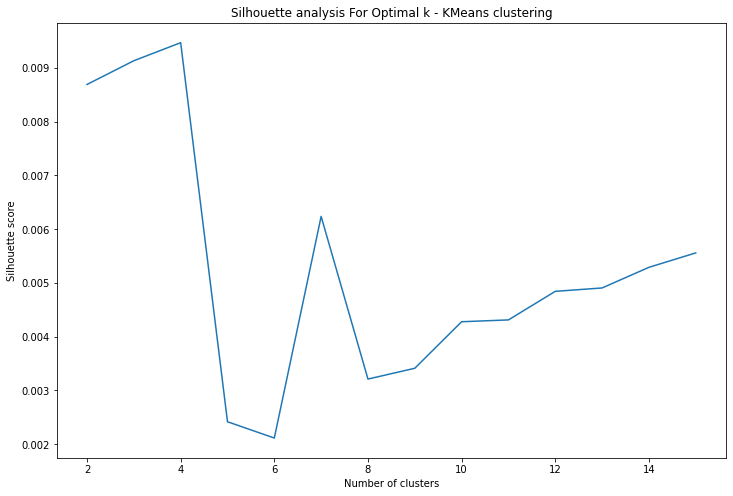

In [53]:
'''Silhouette score method to find the optimal value of k'''

# Initialize a list to store the silhouette score for each value of k
silhouette_avg = []

for k in range(2, 16):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # Compute the silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_avg.append(score)
  
# Plot the Silhouette analysis
plt.plot(range(2,16), silhouette_avg)
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [59]:
# silhouette_score
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
range_n_clusters = [i for i in range(2,10)]
silhouette_score_ = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.008693602031406575
For n_clusters = 3 The average silhouette_score is : 0.0091841504750796
For n_clusters = 4 The average silhouette_score is : 0.009317870727644242
For n_clusters = 5 The average silhouette_score is : 0.005505013220765681
For n_clusters = 6 The average silhouette_score is : 0.006156834890584836
For n_clusters = 7 The average silhouette_score is : 0.0025336083043462705
For n_clusters = 8 The average silhouette_score is : 0.0036396202945480987
For n_clusters = 9 The average silhouette_score is : 0.003327013942408167


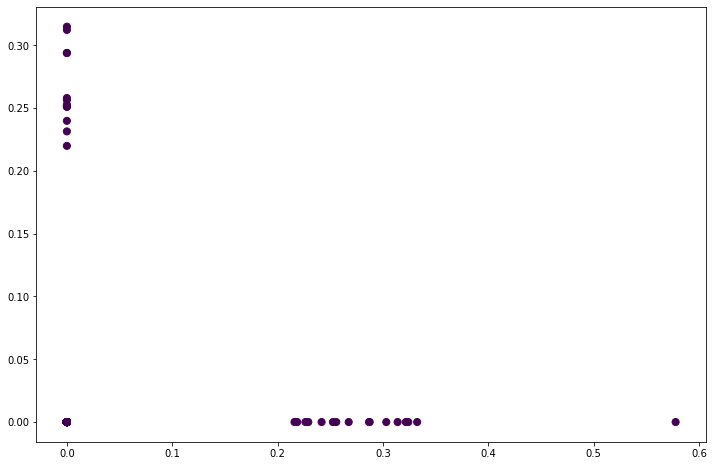

In [61]:
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')

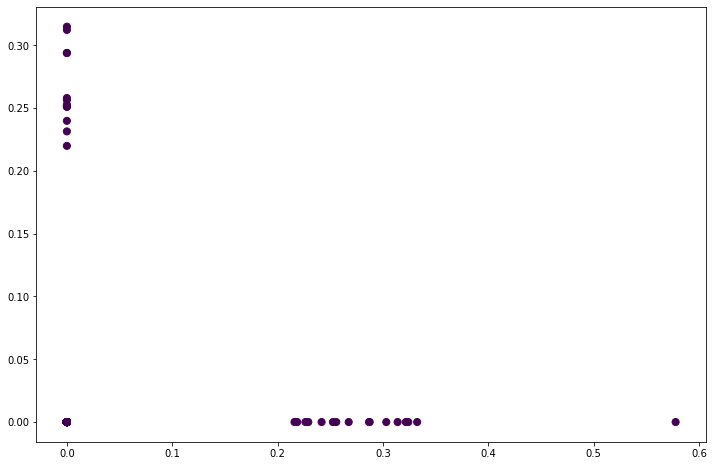

In [60]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=4, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')

In [62]:
# kmeans - 4

In [64]:
# Clustering the data into 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=10)
kmeans.fit(X)     

KMeans(n_clusters=4, random_state=10)

In [65]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))

(7514.877470708541, 0.009317870727644242)


In [66]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

In [67]:
df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'kmeans_cluster']]

,type,title,director,cast,country,rating,listed_in,description,kmeans_cluster
6726,Movie,The Original Kings of Comedy,Spike Lee,"Steve Harvey, D.L. Hughley, Cedric the Enterta...",United States,R,Stand-Up Comedy,Director Spike Lee documents the last night of...,3
5399,Movie,Sat Shri Akaal England,Vikram Pradhan,"Ammy Virk, Monica Gill, Karamjit Anmol, Sardar...",India,TV-14,"Comedies, Dramas, International Movies",After several failed attempts to obtain a visa...,2
267,Movie,Aakhri Adaalat,Rajiv Mehra,"Vinod Khanna, Dimple Kapadia, Jackie Shroff, S...",India,TV-14,"Action & Adventure, International Movies",An intrepid police inspector forced into a des...,2
2446,TV Show,Go! Go! Cory Carson,,"Alan C. Lim, Paul Killam, Maisie Benson, Kerry...",United States,TV-Y,Kids' TV,"Beep, beep – go, go! Buckle up for fun and adv...",3
5425,Movie,Scandal in Sorrento,Dino Risi,"Vittorio De Sica, Sophia Loren, Lea Padovani, ...","Italy, France",TV-PG,"Classic Movies, Comedies, Independent Movies","When a marshal moves back to his hometown, he ...",2


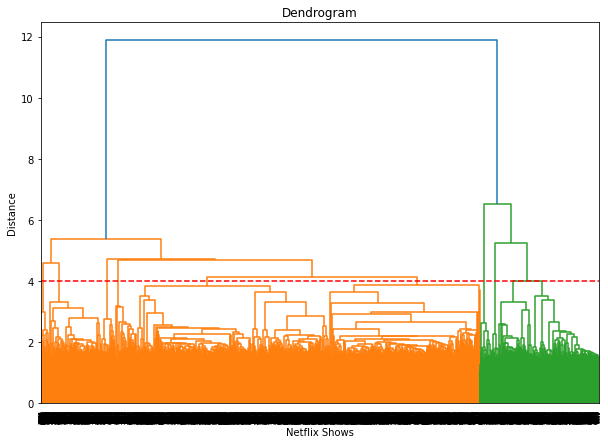

In [69]:
# Building a dendogram to decide the number of clusters
plt.figure(figsize=(10, 7))  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 4, color='r', linestyle='--')

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***